In [20]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import random
from scipy.spatial import distance
from sklearn.neighbors import KDTree

In [21]:
# Carregar os dados de crimes e a área de estudo
df_roubos = gpd.read_file("C:/Users/Vivian - H2R/Downloads/mba/git/mba_dados/shp_estudo/df_roubos_projetado.shp")
area_estudo = gpd.read_file("C:/Users/Vivian - H2R/Downloads/mba/git/mba_dados/shp_estudo/area_projetados.shp")


In [22]:
# Garantir que os dados estão no mesmo sistema de projeção
df_roubos = df_roubos.to_crs(epsg=31983)
area_estudo = area_estudo.to_crs(epsg=31983)

# Obter pontos de crime
crime_coords = np.array([(point.x, point.y) for point in df_roubos.geometry])

# Obter bounding box para geração de pontos aleatórios
minx, miny, maxx, maxy = area_estudo.total_bounds
bbox = area_estudo.total_bounds

In [23]:
# Obter coordenadas dos pontos de crime
crime_coords = np.array([(point.x, point.y) for point in df_roubos.geometry])

In [24]:

# Coordenadas do polígono da área de estudo
minx, miny, maxx, maxy = area_estudo.total_bounds


In [25]:
def calculate_F(points, area_polygon, num_simulations=99, distances=30):
    # Calcula a distribuição observada
    kd_tree = KDTree(points, leaf_size=30, metric='euclidean')
    dists, _ = kd_tree.query(points, k=2)
    observed = np.cumsum(np.bincount(np.digitize(dists[:, 1], bins=np.linspace(0, maxx, distances)))/(len(points)))

    # Calcula a distribuição esperada usando simulação aleatória
    random_dists = []
    for _ in range(num_simulations):
        rand_points = np.array([(random.uniform(minx, maxx), random.uniform(miny, maxy)) for _ in range(len(points))])
        rand_tree = KDTree(rand_points, leaf_size=30, metric='euclidean')
        rdists, _ = rand_tree.query(rand_points, k=2)
        random_dists.append(rdists[:, 1])
        
    avg_random = np.mean([np.cumsum(np.bincount(np.digitize(rd, bins=np.linspace(0, maxx, distances)))/(len(points)))
                          for rd in random_dists], axis=0)

    return observed, avg_random, np.linspace(0, maxx, distances)

# Calcular a função F
observed, expected, distance_bins = calculate_F(crime_coords, area_estudo)


ValueError: x and y must have same first dimension, but have shapes (29,) and (2,)

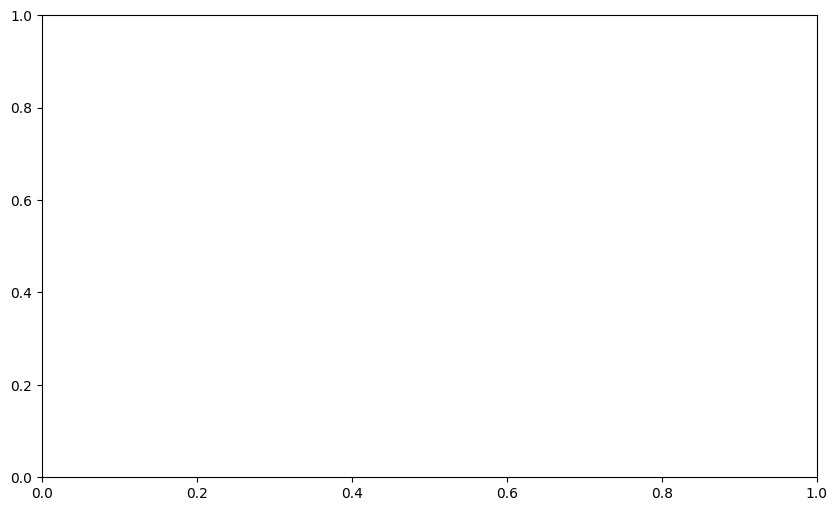

In [26]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(distance_bins[:-1], observed, label='Função F Observada', color='blue')
plt.plot(distance_bins[:-1], expected, label='Função F Esperada (Aleatória)', color='red', linestyle='--')
plt.xlabel('Distância')
plt.ylabel('Proporção Acumulada')
plt.title('Função F - Espaços Vazios')
plt.legend()
plt.grid(True)
plt.show()
